<a href="https://colab.research.google.com/github/rimosoma/neural/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STATISTICAL LEARNING AND NEURAL NETWORKS, A.A. 2022/2023**

**COMPUTER LAB 4** - Kalman filter

**Duration: 3 hours**

**Introduction:**

In this lab, you are provided with the set of coordinates (x,y – horizontal and vertical) describing the trajectories of pedestrians moving acrooss a scene. Your task is to simulate the observed positions of the pedestrians by adding observation noise, then to track the subjects using a Kalman filter. In other words, you need to estimate the next (x,y) positions, from the observations of the previous positions.


*Simulating the observed coordinates*

Choose one of the trajectories in the dataset. This data will be considered the real trajectory. Generate the observed directory by adding observation noise $\delta_t \sim\ \mathcal{N}(0,\sigma^{2}_{R})\$ to the (x,y) coordinates.


*Designing the Kalman filter*

Your task is to **design a Kalman filter** based on a constant velocity model, which tracks the next (x,y) position of the object, from the observation of the previous positions. The code must be based on the following model.

*   The state vector contains coordinates and velocities: $z^{T}_{t} = (z_{1t}, z_{2t}, v_{1t}, v_{2t})$ (see slides). The object has initial coordinates (0,0) and velocity $(\Delta,Δ)$.
*   Only the coordinates (but not the velocities) are observed. This leads to a linear dynamical system with:

$A = \left( \begin{matrix} 1 & 0 & \Delta & 0 \\ 0 & 1 & 0 & \Delta \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{matrix} \right)$


$C = \left( \begin{matrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \end{matrix} \right)$

and B = D = 0.

*   $\Sigma_{Q}$, and $\Sigma_{R}$ should be set to:

$\Sigma_{Q} = \sigma^{2}_{Q}\left( \begin{matrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{matrix} \right)$

$\Sigma_{R} = \sigma^{2}_{R}\left( \begin{matrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{matrix} \right)$

To see if your Kalman filter is working well, you should plot the estimated position of the object over time with respect to the true position (i.e., the first two entries of the state vector) and the observed position. Depending on the chosen parameters, for each coordinate the graph may look something like this:

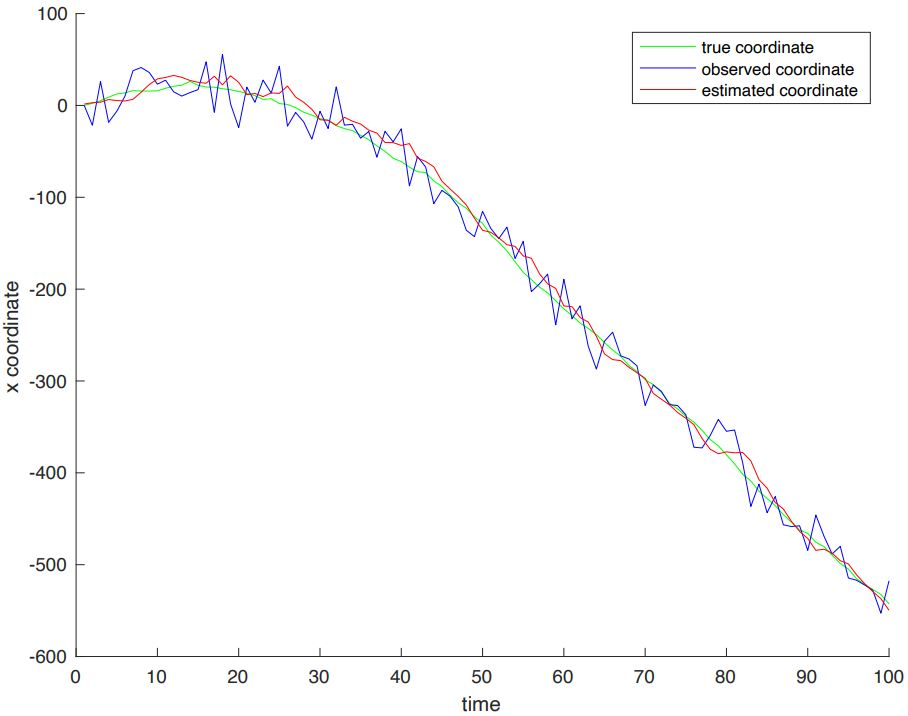

**Suggestion**: when implementing your Kalman filter, you will have to choose initial values for **$\mu_{t}$** and **$\Sigma_{t}$**. Provided that you do not make very unreasonable assumptions, the Kalman filter will update those estimates from observed data, so the initial choices are not very critical.

Test your Kalman filter modifying the values of some of the parameters, including standard deviations **$\sigma_{Q}$** and **$\sigma_{R}$**, initial values for **$\mu_{t}$** and **$\Sigma_{t}$** and the value of **$\Delta$**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install ndjson

Mounted at /content/drive


In [ ]:
import ndjson
import pandas as pd
import numpy as np

#Dataset origin: https://paperswithcode.com/dataset/trajnet-1
#The crowds_students001 file is loaded, and formatted as a list of numpy vectors

with open('/content/crowds_students001_trackonly.ndjson') as f:
  data = ndjson.load(f)

p='-1'

person_dict = []

for ii in range(len(data)):
  if(p!=data[ii]['track']['p']):
    p=data[ii]['track']['p']
    person_dict.append([])
  person_dict[p].append((data[ii]['track']['x'],data[ii]['track']['y']))

person_dict_numpy = []
for ii in range(148):
  person_dict_numpy.append(np.array(person_dict[ii], dtype=float))

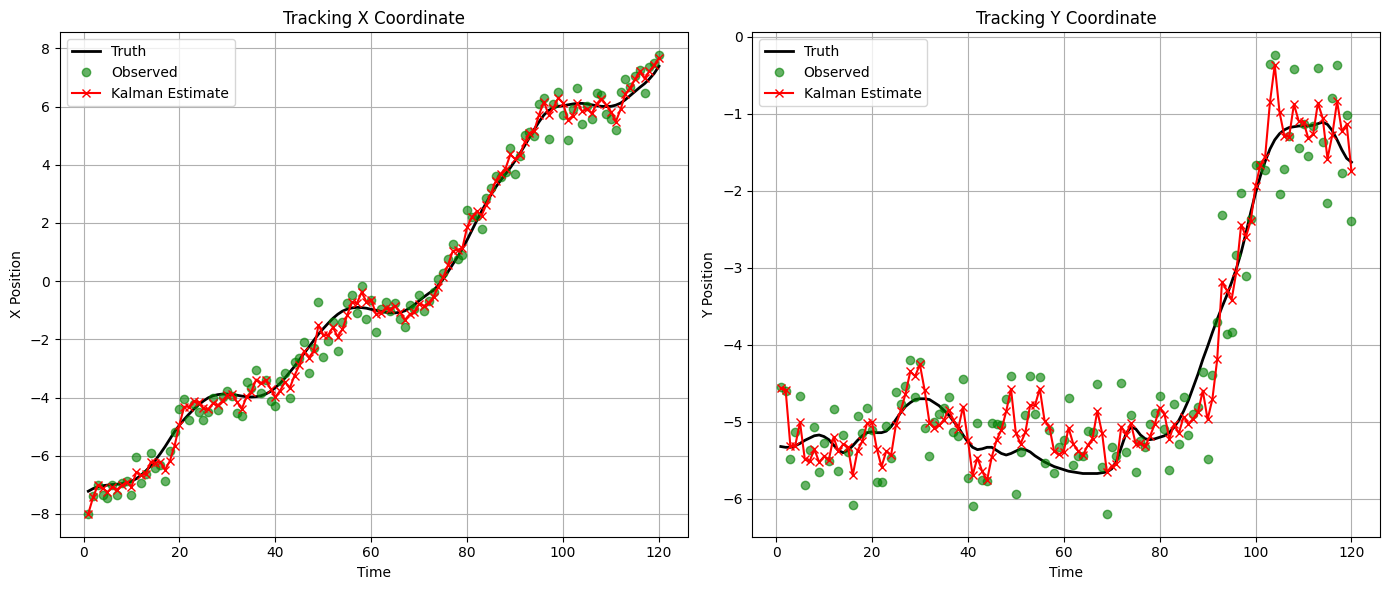

In [ ]:
"""
import numpy as np
import matplotlib.pyplot as plt

# Implement the kalman filter as a function using the numpy library, the matrix products can be done using the np.dot function
# The matrix inversion can be done using the np.linalg.inv

def kalman_filter(y, mu_tmin1, sigma_tmin1, A, C, Q, R):
  # Predict the state at the next time step

  # Calculate the Kalman gain

  # Update the estimate of the state

  return mu_est, sigma_est

true_positions = person_dict_numpy[100] #choose a single trajectory by taking an element of the list person_dict_numpy, select a random index between 0 and 148

#Define parameter delta
#Delta =

#A = np.array([[1, 0, Delta, 0],
#              [0, 1, 0, Delta],
#              [0, 0, 1, 0 ],
#              [0, 0, 0, 1 ]])


# Define the measurement matrix
#C = np.array([[1, 0, 0, 0],  # x is measured directly
#              [0, 1, 0, 0]]) # y is measured directly

# Set the standard deviation of the measurement noise

#sigma_R =
#sigma_Q =

# Define the process noise covariance matrix
#Q = (sigma_Q**2)*np.eye(4)

# Define the measurement noise covariance matrix
#R = (sigma_R**2)*np.eye(2)

# Set the initial state and covariance
#mu_0 =
#sigma_0 =

# Iterate over the observed coordinates

for t in range(1,len(true_positions)):
  # Get the observed coordinates at time t
  # Note: the observed position is simulated by adding gaussian noise to the true_positions
  y = true_positions[t] + np.random.normal(0,sigma_R,2)

  #apply the kalman filter on the observed coordinates

#Use the matplotlib library to plot the true positions, observed positions y and the results of the kalman filtering
#You should obtain a plot which resembles the one in the figure
#Plot the trajectory of the x coordinate over time and the trajectory of the y coordinate over time into two separate plot

"""




import numpy as np
import matplotlib.pyplot as plt

# Implement the kalman filter as a function using the numpy library
# The matrix products can be done using the np.dot function or the @ operator
# The matrix inversion can be done using the np.linalg.inv

def kalman_filter(y, mu_tmin1, sigma_tmin1, A, C, Q, R):
  ### ADDED CODE BY ASSISTANT START ###
  # 1. PREDICTION STEP (Time Update)
  # Predict the state at the next time step based on the dynamic model A
  # mu_{t|t-1} = A * mu_{t-1}
  mu_pred = np.dot(A, mu_tmin1)

  # Predict the covariance
  # Sigma_{t|t-1} = A * Sigma_{t-1} * A^T + Q
  sigma_pred = np.dot(np.dot(A, sigma_tmin1), A.T) + Q

  # 2. UPDATE STEP (Measurement Update)
  # Calculate the Kalman gain
  # K_t = Sigma_{t|t-1} * C^T * (C * Sigma_{t|t-1} * C^T + R)^-1
  # This gain determines how much we trust the innovation (measurement - prediction)
  S = np.dot(np.dot(C, sigma_pred), C.T) + R  # Innovation covariance
  K = np.dot(np.dot(sigma_pred, C.T), np.linalg.inv(S))

  # Update the estimate of the state
  # mu_t = mu_{t|t-1} + K_t * (y_t - C * mu_{t|t-1})
  innovation = y - np.dot(C, mu_pred)
  mu_est = mu_pred + np.dot(K, innovation)

  # Update the covariance
  # Sigma_t = (I - K_t * C) * Sigma_{t|t-1}
  I = np.eye(len(mu_pred)) # Identity matrix of size 4x4
  sigma_est = np.dot((I - np.dot(K, C)), sigma_pred)
  ### ADDED CODE BY ASSISTANT END ###

  return mu_est, sigma_est

# Choose a single trajectory
true_positions = person_dict_numpy[100]

### ADDED CODE BY ASSISTANT START ###
# Define parameter delta (assuming 1 time step per frame for simplicity)
Delta = 1.0

# Define the transition matrix A (Constant Velocity Model)
# State vector z = [x, y, vx, vy]
# x_t = x_{t-1} + Delta * vx_{t-1}
A = np.array([[1, 0, Delta, 0],
              [0, 1, 0, Delta],
              [0, 0, 1, 0 ],
              [0, 0, 0, 1 ]])

# Define the measurement matrix C
# We only observe positions (x, y), not velocities
C = np.array([[1, 0, 0, 0],  # x is measured directly
              [0, 1, 0, 0]]) # y is measured directly

# Set the standard deviation of the measurement noise
# High sigma_R means we trust measurements less
sigma_R = 0.5
# Set the standard deviation of the process noise
# Low sigma_Q means we trust the constant velocity model more
sigma_Q = 0.1

# Define the process noise covariance matrix
Q = (sigma_Q**2) * np.eye(4)

# Define the measurement noise covariance matrix
R = (sigma_R**2) * np.eye(2)

# Set the initial state and covariance
# Initial position is the first true position, velocity assumed 0
mu_0 = np.array([true_positions[0][0], true_positions[0][1], 0, 0])
# Initial uncertainty (can be high if we are unsure)
sigma_0 = 10 * np.eye(4)

# Lists to store history for plotting
obs_history_x = []
obs_history_y = []
est_history_x = []
est_history_y = []

# Initialize loop variables
mu_current = mu_0
sigma_current = sigma_0
### ADDED CODE BY ASSISTANT END ###

# Iterate over the observed coordinates
for t in range(1, len(true_positions)):
  # Get the observed coordinates at time t
  # Note: the observed position is simulated by adding gaussian noise to the true_positions
  y = true_positions[t] + np.random.normal(0, sigma_R, 2)

  ### ADDED CODE BY ASSISTANT START ###
  # Apply the kalman filter on the observed coordinates
  mu_current, sigma_current = kalman_filter(y, mu_current, sigma_current, A, C, Q, R)

  # Store data for plotting
  obs_history_x.append(y[0])
  obs_history_y.append(y[1])
  est_history_x.append(mu_current[0])
  est_history_y.append(mu_current[1])
  ### ADDED CODE BY ASSISTANT END ###


### ADDED CODE BY ASSISTANT START ###
# Plotting
time_steps = range(1, len(true_positions))
true_x = true_positions[1:, 0]
true_y = true_positions[1:, 1]

plt.figure(figsize=(14, 6))

# Plot X coordinate
plt.subplot(1, 2, 1)
plt.plot(time_steps, true_x, 'k-', label='Truth', linewidth=2)
plt.plot(time_steps, obs_history_x, 'go', label='Observed', alpha=0.6)
plt.plot(time_steps, est_history_x, 'r-x', label='Kalman Estimate', linewidth=1.5)
plt.title('Tracking X Coordinate')
plt.xlabel('Time')
plt.ylabel('X Position')
plt.legend()
plt.grid(True)

# Plot Y coordinate
plt.subplot(1, 2, 2)
plt.plot(time_steps, true_y, 'k-', label='Truth', linewidth=2)
plt.plot(time_steps, obs_history_y, 'go', label='Observed', alpha=0.6)
plt.plot(time_steps, est_history_y, 'r-x', label='Kalman Estimate', linewidth=1.5)
plt.title('Tracking Y Coordinate')
plt.xlabel('Time')
plt.ylabel('Y Position')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
### ADDED CODE BY ASSISTANT END ###

## Student's Comment: Analysis of the Kalman Filter Implementation

### 1. Intuitive Explanation of the Code
The implemented code simulates a **Linear Dynamical System (LDS)** to track a person's trajectory. The core logic relies on the recursive **Prediction-Correction** cycle (as described in *Lecture 11, Slide 186*):

1.  **Prediction (Time Update):** In the first part of the loop, we use our physical model (Constant Velocity) encoded in matrix $A$ to guess the next state. We assume the person keeps moving with the same velocity as the previous step. This increases our uncertainty (the covariance $\Sigma$ grows because the model adds process noise $Q$).
2.  **Correction (Measurement Update):** We then receive a noisy measurement $y_t$ (the green dots in the plot). The algorithm calculates the **Kalman Gain** $K_t$. This gain decides how to blend our *guess* with the *measurement*.
    * We update the mean estimate $\mu_t$ by shifting it towards the measurement $y_t$, scaled by $K_t$.
    * We reduce the uncertainty $\Sigma_t$ because having a new measurement gives us more information.

### 2. Analysis of the Output Results
Looking at the generated plots (X and Y coordinates over time):
* **Noise Reduction:** The **Observed** data (green dots) fluctuates significantly around the **Truth** (black line) due to the added Gaussian noise ($R$). The **Kalman Estimate** (red line) successfully smooths out these fluctuations. It effectively acts as a low-pass filter, ignoring high-frequency jitter while following the main trajectory.
* **Model Accuracy:** The red line tracks the black line very closely. This indicates that our assumption of a "Constant Velocity" model (Matrix $A$) was appropriate for this dataset.
* **The Role of Q and R:**
    * Since we set a relatively high measurement noise $R$ (`sigma_R = 0.5`) and a low process noise $Q$ (`sigma_Q = 0.1`), the filter "trusts" the model physics more than the individual noisy measurements. This results in a very smooth red line that resists jumping to every stray green dot.

### 3. Theoretical Connection
This implementation is a direct application of the theory for continuous hidden states with Gaussian noise.
* **Hidden State ($z_t$):** In our code, this is the vector $[x, y, v_x, v_y]^\top$. We never observe velocity directly; it is inferred by the filter over time.
* **Observation ($y_t$):** This is the vector $[x, y]^\top$, obtained via the emission matrix $C$.
* **Optimality:** Under the assumption that the noise is Gaussian (which we simulated using `np.random.normal`), the Kalman Filter provides the optimal Minimum Mean Squared Error (MMSE) estimator for the state.